# Reinforcement Learning - Sutton and Barto
# Exercise 5.12

Monte Carlo

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats

from racetrack import racetrack

# Initialize Environment

In [2]:
env = racetrack(1)

<Axes: >

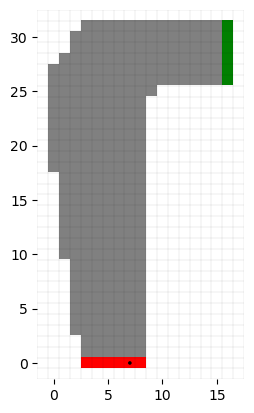

In [3]:
env.render()

In [4]:
env = racetrack(2)

<Axes: >

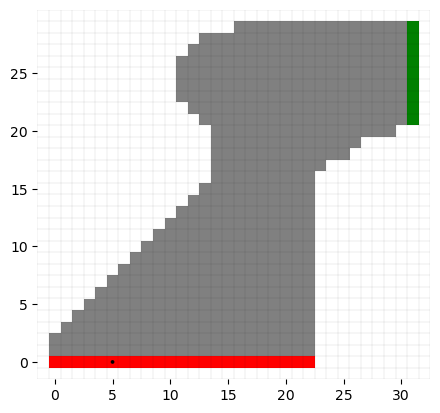

In [5]:
env.render()

## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [6]:
action_values_curve = [np.zeros((32,17,6,6,9)), np.zeros((30,32,6,6,9))]

## Define the policy $\pi(s)$

In [7]:
def policy(state, action_values, epsilon=0.1):
    if np.random.random() < epsilon:
        return np.random.choice(9)
    else:
        index = np.hstack(state)
        av = action_values[index[0], index[1], index[2], index[3]]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [8]:
state = [np.array([0,3]), np.array([0,0])]
state = np.hstack(state)
av = action_values_curve[0][state[0], state[1], state[2], state[3]]
print(f"{av}")

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
state = [np.array([0,3]), np.array([0,0])]
action = policy(state, action_values_curve[0], epsilon=0.5)
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 5


# Run Scenario

In [10]:
def run_episode(curve_number, epsilon=0.1, render=False):
    steps = 0
    env = racetrack(curve_number)
    transitions = []

    state = env.reset()

    done = False

    while not done:
        action = policy(state, action_values_curve[curve_number - 1], epsilon)
        next_state, reward, done = env.step(action)
        steps += 1
        transitions.append([state, action, reward])
        state = next_state.copy()
        if render:
            env.render()

    if render:
        print(f"Steps: {steps}")
    return transitions
    

## Implement the On-Policy first-visit MC Control algorithm

In [11]:
def on_policy_mc_control(episodes, curve_number=1, gamma=0.99, epsilon=0.1, render=False):
    
    returns = {}
    
    if render and (episodes > 10):
        render = False
        print(f"Too many episodes to render!")
    
    for episode in range(1, episodes + 1):
        transitions = run_episode(curve_number, epsilon, render)
        G = 0
        
        t = len(transitions)

        for state_t, action_t, reward_t in reversed(transitions):
            G = gamma * G + reward_t
            
            t += -1
            if not (state_t, action_t) in transitions[:t]:
                index = np.hstack(state_t)
                if not (index[0], index[1], index[2], index[3], action_t) in returns:
                    returns[(index[0], index[1], index[2], index[3], action_t)] = []
                returns[(index[0], index[1], index[2], index[3], action_t)].append(G)
                action_values_curve[curve_number - 1][index[0], index[1], index[2], index[3]][action_t] = np.mean(returns[(index[0], index[1], index[2], index[3], action_t)])
                
        if (episode % 1000 == 0):
            print(f"Episode: {episode} | Return: {G} | Transitions: {len(transitions)}")
        
    return action_values_curve

In [12]:
action_values_curve = on_policy_mc_control(100000, curve_number=1, gamma=0.99, epsilon=0.2)

Episode: 1000 | Return: -37.01763687967674 | Transitions: 47
Episode: 2000 | Return: -32.42709509397166 | Transitions: 40
Episode: 3000 | Return: -19.027213177874142 | Transitions: 22
Episode: 4000 | Return: -43.03987975228405 | Transitions: 57
Episode: 5000 | Return: -22.21786406008532 | Transitions: 26
Episode: 6000 | Return: -57.440987661134486 | Transitions: 86
Episode: 7000 | Return: -25.282790566840355 | Transitions: 30
Episode: 8000 | Return: -28.22694674017248 | Transitions: 34
Episode: 9000 | Return: -36.38145139361287 | Transitions: 46
Episode: 10000 | Return: -19.8369410460954 | Transitions: 23
Episode: 11000 | Return: -44.1733861452136 | Transitions: 59
Episode: 12000 | Return: -28.22694674017248 | Transitions: 34
Episode: 13000 | Return: -50.51613403997926 | Transitions: 71
Episode: 14000 | Return: -24.528071279636723 | Transitions: 29
Episode: 15000 | Return: -11.361512828387072 | Transitions: 13
Episode: 16000 | Return: -21.4321859192781 | Transitions: 25
Episode: 17000 

In [13]:
action_values_curve = on_policy_mc_control(100000, curve_number=2, gamma=0.99, epsilon=0.2)

Episode: 1000 | Return: -12.247897700103202 | Transitions: 14
Episode: 2000 | Return: -11.361512828387072 | Transitions: 13
Episode: 3000 | Return: -11.361512828387072 | Transitions: 13
Episode: 4000 | Return: -45.284335760923845 | Transitions: 61
Episode: 5000 | Return: -29.655230500043047 | Transitions: 36
Episode: 6000 | Return: -36.38145139361287 | Transitions: 46
Episode: 7000 | Return: -23.76572856528962 | Transitions: 28
Episode: 8000 | Return: -14.854222890512437 | Transitions: 17
Episode: 9000 | Return: -7.72553055720799 | Transitions: 9
Episode: 10000 | Return: -11.361512828387072 | Transitions: 13
Episode: 11000 | Return: -8.64827525163591 | Transitions: 10
Episode: 12000 | Return: -22.995685419484467 | Transitions: 27
Episode: 13000 | Return: -17.383137616441328 | Transitions: 20
Episode: 14000 | Return: -9.561792499119552 | Transitions: 11
Episode: 15000 | Return: -12.247897700103202 | Transitions: 14
Episode: 16000 | Return: -10.466174574128356 | Transitions: 12
Episode: 

Steps: 15
Steps: 14
Steps: 14
Steps: 13
Steps: 14


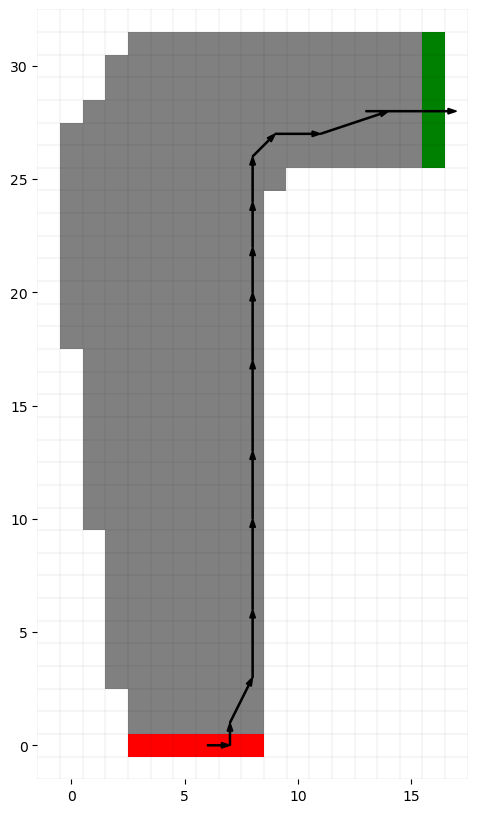

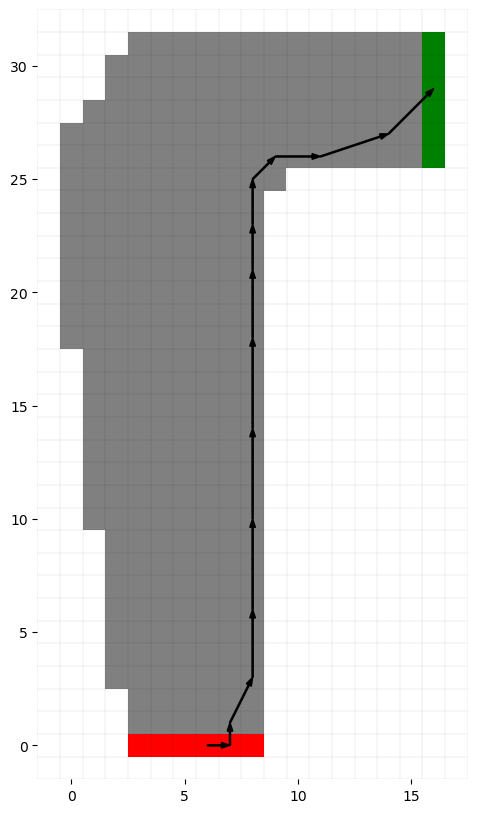

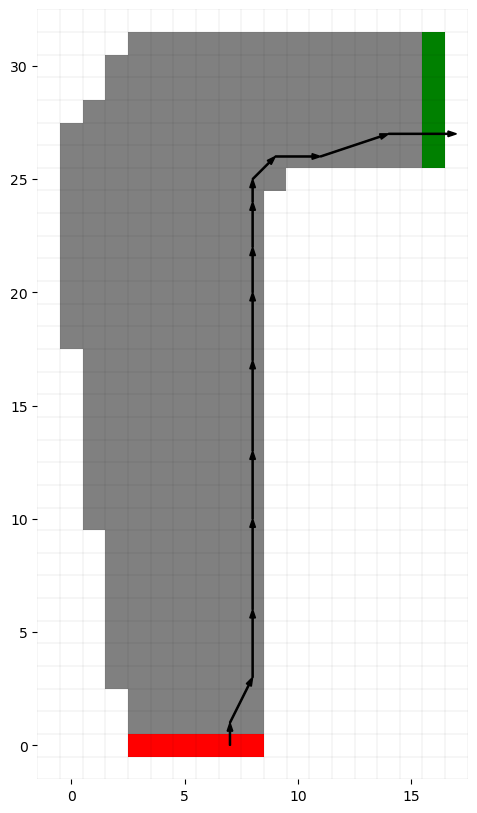

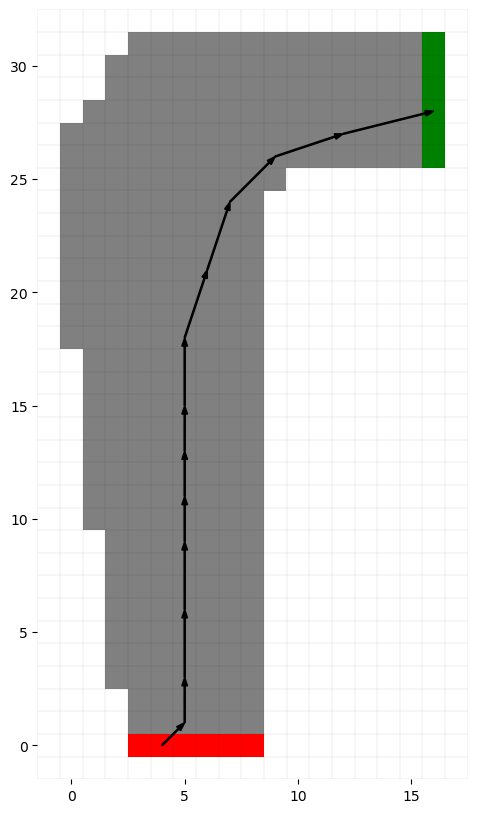

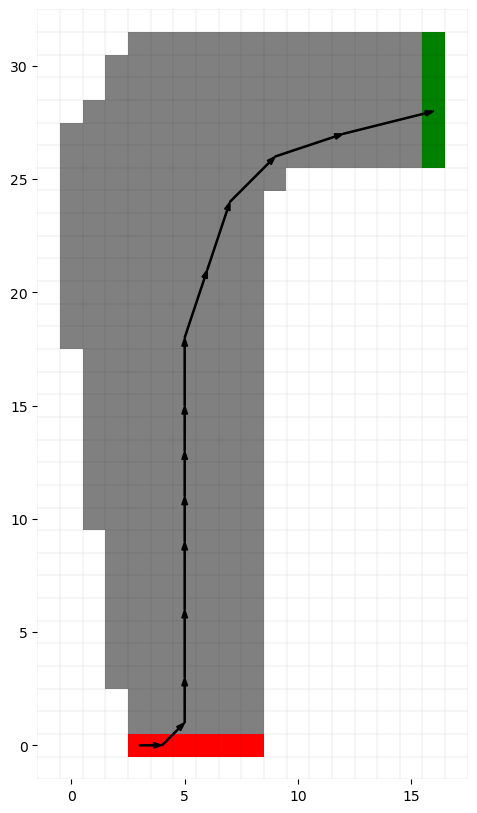

In [117]:
for a in range(5):
    run_episode(1, epsilon=0, render=True)

Steps: 13
Steps: 11
Steps: 13
Steps: 10
Steps: 10


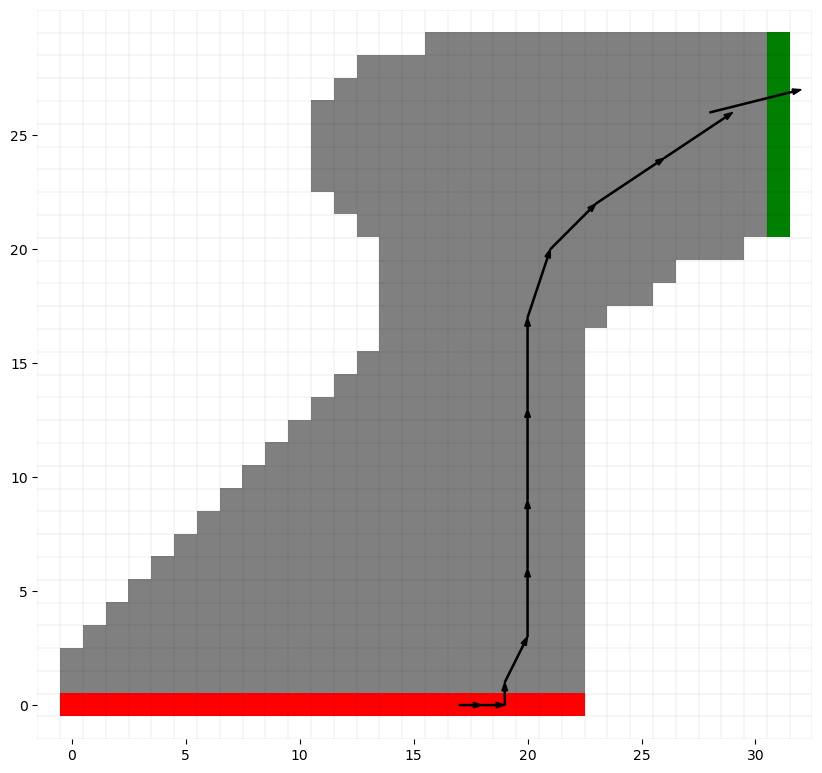

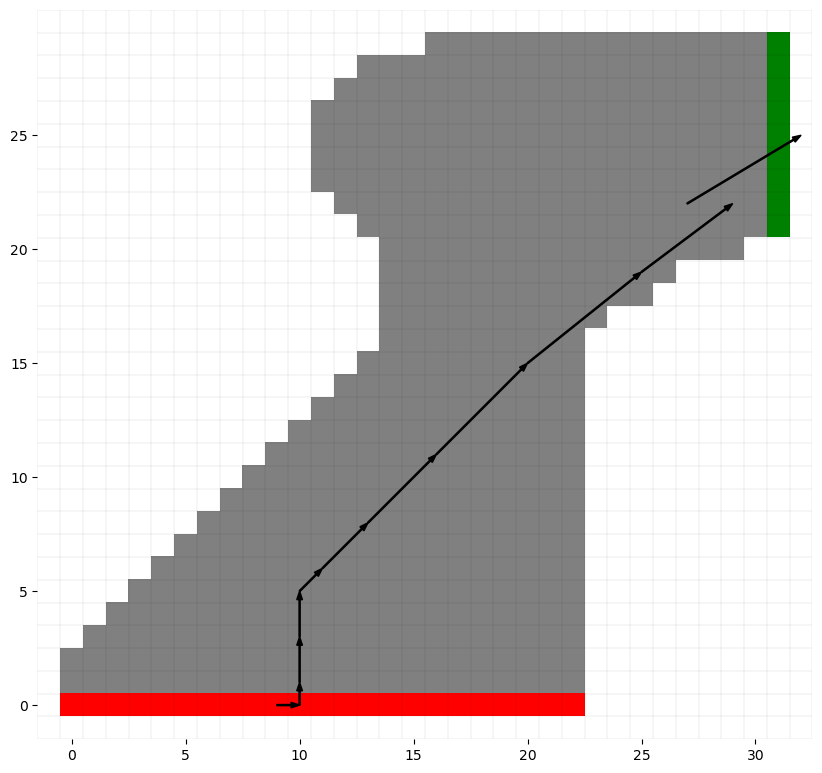

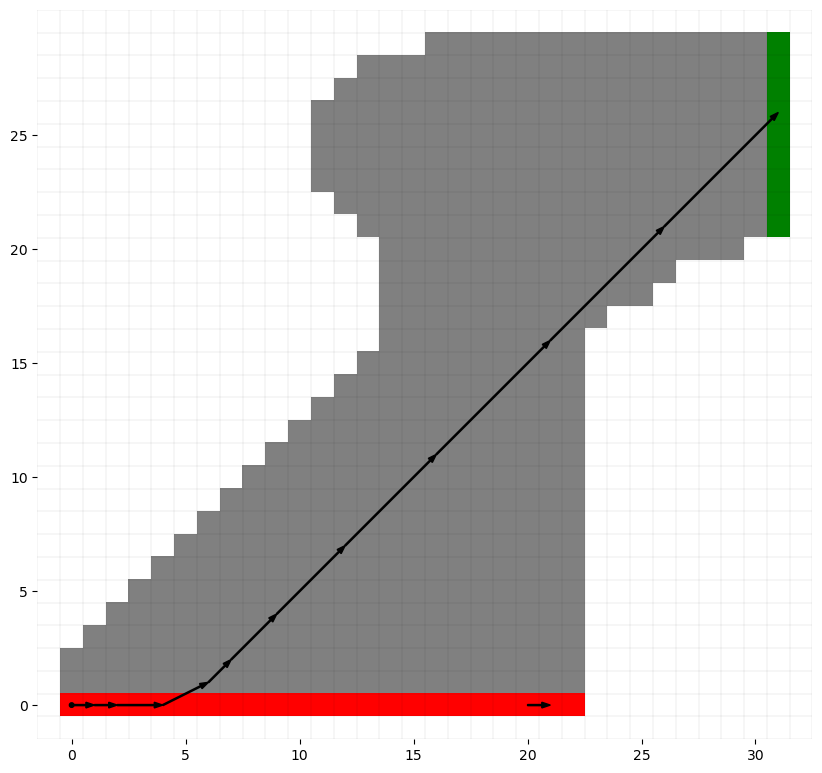

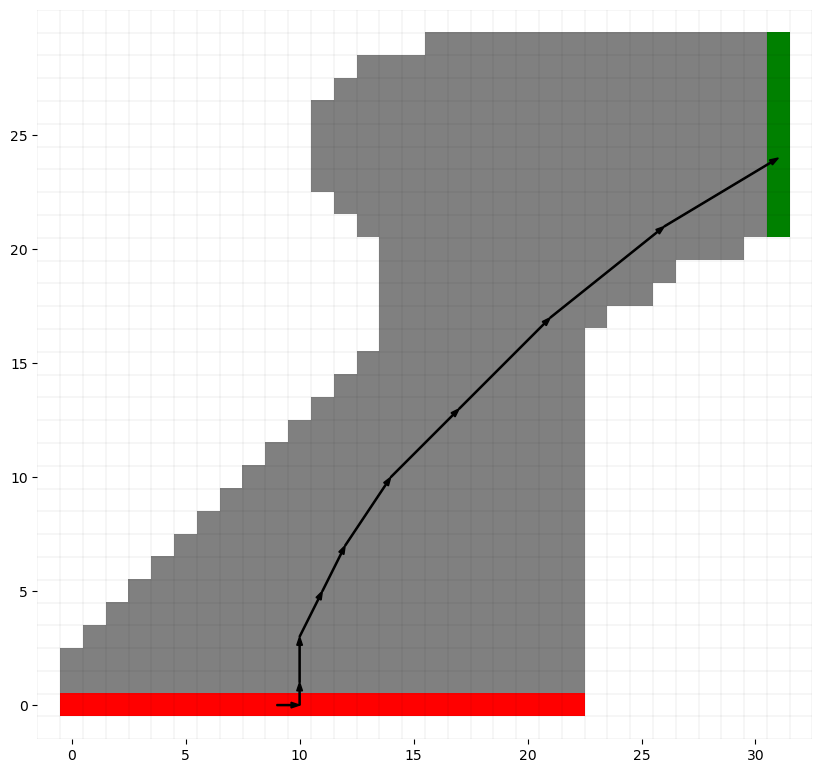

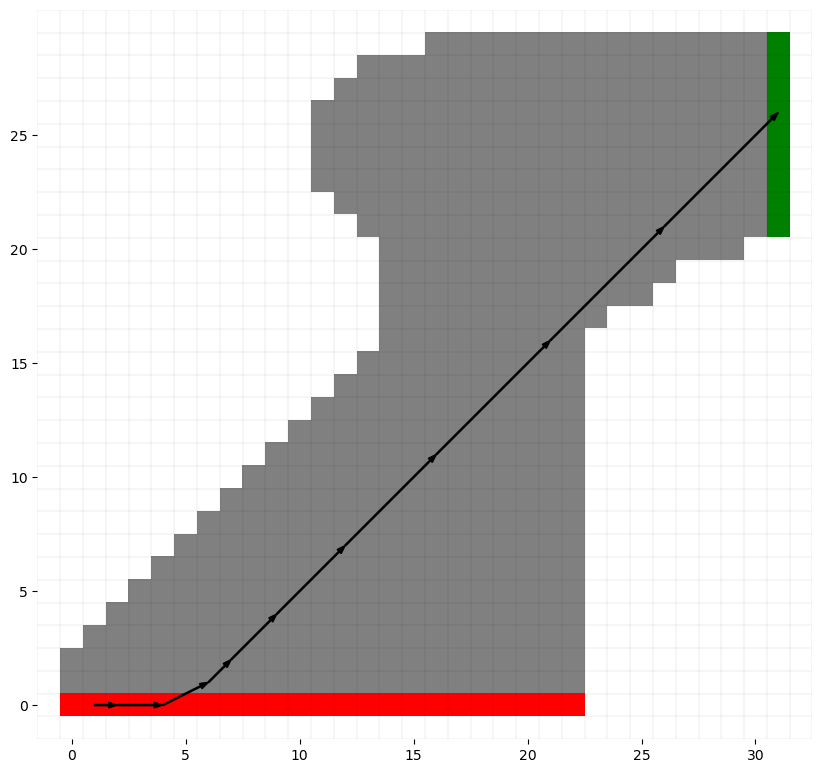

In [118]:
for a in range(5):
    run_episode(2, epsilon=0, render=True)

In [16]:
def plot_values(values):
        if values is not None:

            v=np.max(values, axis=4, keepdims=True)
            v=np.mean(v, axis=(2,3))
            
            unvisited_filter = np.where(v == 0.0)
            v[unvisited_filter] = np.nan
            
            plt.figure()
            plt.title("Value Function Averaged over Speeds")
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.imshow(v, origin='lower')
            plt.colorbar()

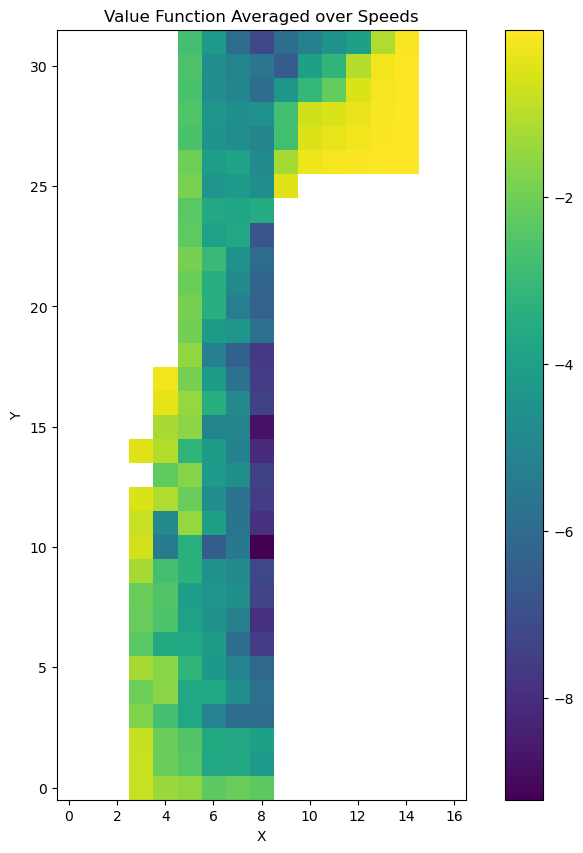

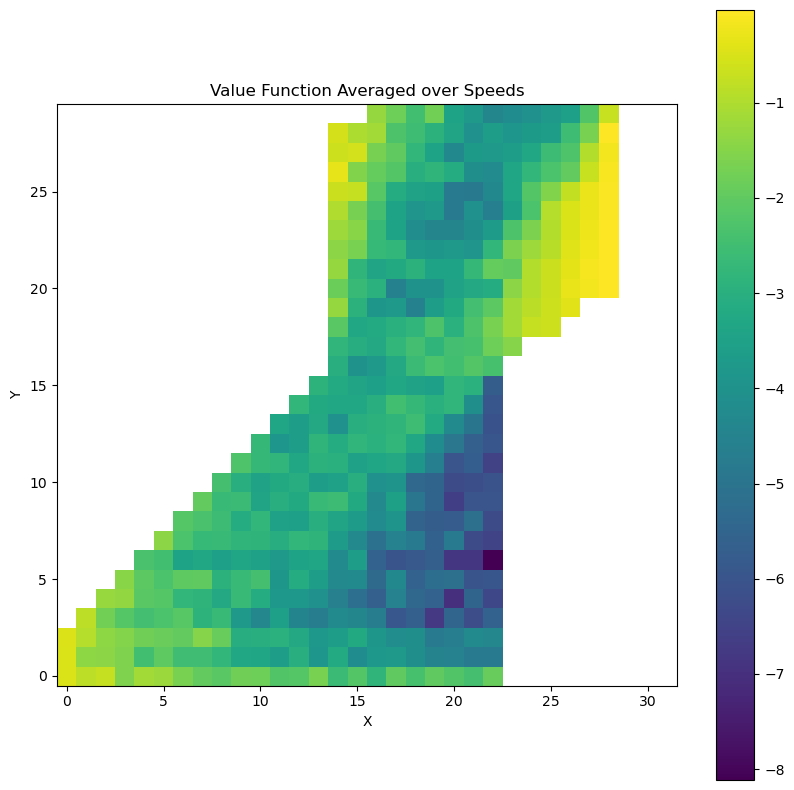

In [17]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
plot_values(action_values_curve[0])
plot_values(action_values_curve[1])